In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import convolve2d
import scipy.ndimage as ndimage
from scipy import signal
import pandas as pd
import os
import math

In [3]:
main_folder = '/kaggle/input/monkypo/Original Images/Original Images'

# Initialize an empty list to store the file paths and labels
image_data = []

# Loop through each subfolder (label)
for label in os.listdir(main_folder):
    label_folder = os.path.join(main_folder, label)
    
    # Check if it's a directory (subfolder containing images)
    if os.path.isdir(label_folder):
        # Loop through each image file in the subfolder
        for image_name in os.listdir(label_folder):
            # Construct the full image path
            image_path = os.path.join(label_folder, image_name)
            
            # Extract the image name (without the extension)
            image_basename = os.path.basename(image_path).split('.')[0]
            
            # Add the image path, image name, and label to the list
            image_data.append([image_path, image_basename, label])

# Create a DataFrame from the list of image paths, image names, and labels
df = pd.DataFrame(image_data, columns=['File Path', 'Image Name', 'Label'])

# Save the DataFrame to a CSV file
csv_file_path = 'image_labels.csv'
df.to_csv(csv_file_path, index=False)

# Print the first few rows of the DataFrame
print(df.head())

                                           File Path Image Name   Label
0  /kaggle/input/monkypo/Original Images/Original...    NM18_01  Others
1  /kaggle/input/monkypo/Original Images/Original...    NM22_01  Others
2  /kaggle/input/monkypo/Original Images/Original...    NM51_01  Others
3  /kaggle/input/monkypo/Original Images/Original...    NM58_01  Others
4  /kaggle/input/monkypo/Original Images/Original...    NM90_01  Others


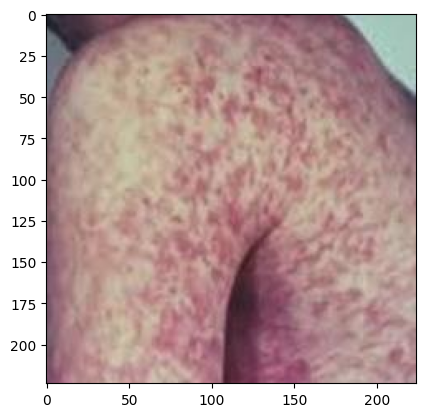

In [4]:
image = cv2.imread(df.iloc[0,0])
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

In [5]:
from skimage import io
from skimage.filters import unsharp_mask
from skimage import data, filters, img_as_ubyte

In [6]:
sharpened_images = []

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    # Read the image
    image = cv2.imread(row['File Path'])
    # Apply unsharp mask (adjust parameters as needed)
    sharpened_image = unsharp_mask(image, radius=3, amount=1.5)
    sharpened_image = img_as_ubyte(sharpened_image)
    # Append the sharpened image to the list
    sharpened_images.append(sharpened_image)

# Add the sharpened images to the DataFrame
df['Sharpened Image'] = sharpened_images

# Print the first few rows of the DataFrame to verify
print(df.head())

                                           File Path Image Name   Label  \
0  /kaggle/input/monkypo/Original Images/Original...    NM18_01  Others   
1  /kaggle/input/monkypo/Original Images/Original...    NM22_01  Others   
2  /kaggle/input/monkypo/Original Images/Original...    NM51_01  Others   
3  /kaggle/input/monkypo/Original Images/Original...    NM58_01  Others   
4  /kaggle/input/monkypo/Original Images/Original...    NM90_01  Others   

                                     Sharpened Image  
0  [[[47, 25, 17], [74, 51, 44], [87, 62, 62], [8...  
1  [[[78, 107, 255], [84, 114, 255], [82, 114, 25...  
2  [[[154, 199, 255], [144, 189, 255], [133, 177,...  
3  [[[47, 96, 238], [44, 94, 236], [44, 93, 235],...  
4  [[[24, 59, 131], [0, 10, 82], [0, 0, 70], [2, ...  


In [226]:
sharpened_image = df['Sharpened Image'][0]  # Assign the image to a variable
print(type(sharpened_image))  # Check and print the type of the variable

<class 'numpy.ndarray'>


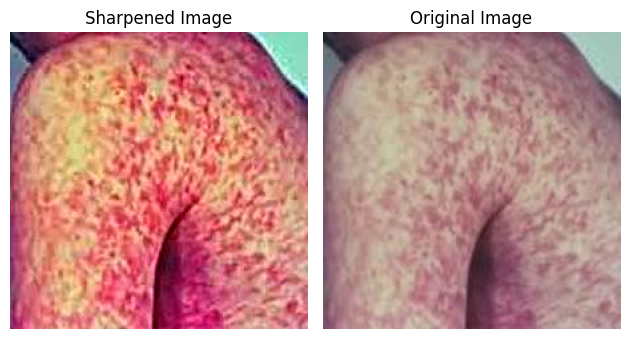

In [7]:
sharpened_image = df['Sharpened Image'][0]  # Assuming it is in float64 format

# Display the Sharpened Image
plt.subplot(121)  # Create the first subplot
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.axis('off')  # Turn off the axes
plt.title("Sharpened Image")

# Display the Original Image
plt.subplot(122)  # Create the second subplot
image = cv2.imread(df.iloc[0, 0])  # Assuming column 0 contains the file path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(image_rgb)  # Display the original image
plt.axis('off')  # Turn off the axes
plt.title("Original Image")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [228]:
df['Image Base'] = df['Image Name'].apply(lambda x: ''.join(x.split('_')[:-1]))  # Extract 'NM15_02'

# Step 2: Count how many times each base image appears in the dataset
image_counts = df.groupby(['Image Base', 'Label']).size().reset_index(name='Augmentation Count')

# Step 3: Print the result
print(image_counts)

    Image Base       Label  Augmentation Count
0          M01  Monkey Pox                   4
1          M02  Monkey Pox                   2
2          M03  Monkey Pox                   1
3          M04  Monkey Pox                   1
4          M05  Monkey Pox                   2
..         ...         ...                 ...
157       NM95      Others                   1
158       NM96      Others                   1
159       NM97      Others                   1
160       NM98      Others                   2
161       NM99      Others                   2

[162 rows x 3 columns]


In [8]:
image_shapes = []
image_resolutions = []

# Loop through the file paths in the DataFrame
for file_path in df['File Path']:
    # Read the image
    image = cv2.imread(file_path)
        # Get the image shape
    height, width, channels = image.shape
    image_shapes.append((height, width, channels))
        
        # Calculate resolution (width × height)
    resolution = width * height
    image_resolutions.append(resolution)

# Add the results to the DataFrame
df['Image Shape'] = image_shapes
df['Resolution'] = image_resolutions

# Display the first few rows of the updated DataFrame
print(df.head())

                                           File Path Image Name   Label  \
0  /kaggle/input/monkypo/Original Images/Original...    NM18_01  Others   
1  /kaggle/input/monkypo/Original Images/Original...    NM22_01  Others   
2  /kaggle/input/monkypo/Original Images/Original...    NM51_01  Others   
3  /kaggle/input/monkypo/Original Images/Original...    NM58_01  Others   
4  /kaggle/input/monkypo/Original Images/Original...    NM90_01  Others   

                                     Sharpened Image    Image Shape  \
0  [[[47, 25, 17], [74, 51, 44], [87, 62, 62], [8...  (224, 224, 3)   
1  [[[78, 107, 255], [84, 114, 255], [82, 114, 25...  (224, 224, 3)   
2  [[[154, 199, 255], [144, 189, 255], [133, 177,...  (224, 224, 3)   
3  [[[47, 96, 238], [44, 94, 236], [44, 93, 235],...  (224, 224, 3)   
4  [[[24, 59, 131], [0, 10, 82], [0, 0, 70], [2, ...  (224, 224, 3)   

   Resolution  
0       50176  
1       50176  
2       50176  
3       50176  
4       50176  


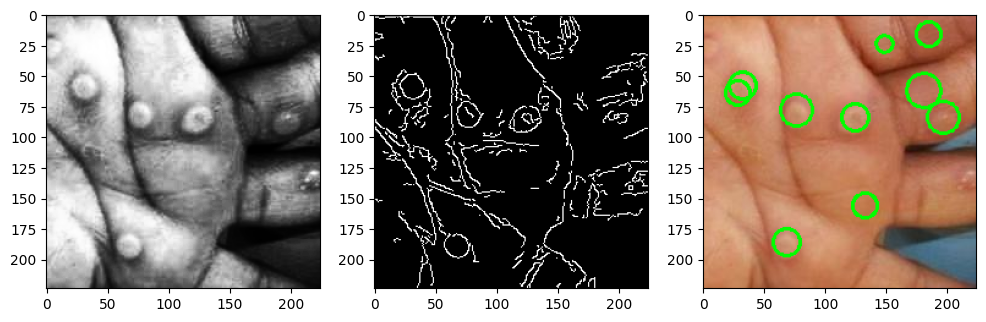

In [9]:
image=cv2.imread('/kaggle/input/monkypo/Original Images/Original Images/Monkey Pox/M06_02.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(gray, cmap='gray')

plt.subplot(132)
edges = cv2.Canny(blurred, threshold1= 100, threshold2=150)
plt.imshow(edges,cmap='gray')

plt.subplot(133)
circles = cv2.HoughCircles(
    blurred, 
    cv2.HOUGH_GRADIENT, 
    dp=1,                  # High resolution for distinct pimples
    minDist=5,            # Ensure separation of circles
    param1=5,             # Edge detection threshold
    param2=18,             # Accumulator threshold for circle sensitivity
    minRadius=5,           # Minimum size of pimples
    maxRadius=15           # Maximum size of pimples
)

# Draw detected circles
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(image, (x, y), r, (0, 255, 0), 2)  # Draw circles

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [11]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def process_image(image_path):
    # Step 1: Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Optional: Improve contrast with histogram equalization
    gray = cv2.equalizeHist(gray)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)


    # Step 3: Apply Hough Circle Transform to detect pimples
    circles = cv2.HoughCircles(
        blurred, 
        cv2.HOUGH_GRADIENT, 
        dp=1,                  # High resolution for distinct pimples
        minDist=5,             # Ensure separation of circles
        param1=5,              # Edge detection threshold
        param2=18,             # Accumulator threshold for circle sensitivity
        minRadius=5,           # Minimum size of pimples
        maxRadius=15           # Maximum size of pimples
    )

    # Draw detected circles
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(image, (x, y), r, (0, 255, 0), 2)  # Draw circles

def process_folder(folder_path):
    # Get all image files in the folder
    for filename in os.listdir(folder_path):
        # Only process image files (you can add more file types if necessary)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            process_image(image_path)

# Example usage
folder_path = '/kaggle/input/monkypo/Original Images/Original Images/Monkey Pox/'  # Adjust your folder path
process_folder(folder_path)


# Canny Edge Detection
The Canny Edge Detection algorithm is a widely used method for detecting edges in images. It works by identifying areas of rapid intensity change, which are often associated with object boundaries. The process involves noise reduction, gradient calculation, non-maximum suppression, and double thresholding to produce precise and continuous edges.


# Hough Circle Transform
The Hough Circle Transform is a technique used to detect circular shapes in images. It works by transforming edge-detected points into a parameter space and identifying circles based on the accumulation of votes for potential circle centers and radii. This method is robust in detecting circles even in noisy or cluttered images.

In [12]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def process_image_from_array(image_array):

    # Step 1: Convert to grayscale
    gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)

    # Optional: Improve contrast with histogram equalization
    gray = cv2.equalizeHist(gray)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    # Step 2: Apply Canny edge detection
    edges = cv2.Canny(blurred, threshold1=100, threshold2=150)
    num_edges = np.sum(edges > 0)  # Count non-zero values in the edges array

    # Step 3: Apply Hough Circle Transform to detect circles
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1,                  # High resolution for distinct pimples
        minDist=5,             # Ensure separation of circles
        param1=5,              # Edge detection threshold
        param2=18,             # Accumulator threshold for circle sensitivity
        minRadius=5,           # Minimum size of pimples
        maxRadius=15           # Maximum size of pimples
    )

    num_circles = 0
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        num_circles = len(circles)

    return num_circles, num_edges


# Add columns for circles and edges detected
df["num_circles"] = 0
df["num_edges"] = 0

# Process each image and update the DataFrame
for index, row in df.iterrows():
    num_circles, num_edges = process_image_from_array(row["Sharpened Image"])
    df.at[index, "num_circles"] = num_circles
    df.at[index, "num_edges"] = num_edges

# Display the updated DataFrame
print(df)

                                             File Path Image Name       Label  \
0    /kaggle/input/monkypo/Original Images/Original...    NM18_01      Others   
1    /kaggle/input/monkypo/Original Images/Original...    NM22_01      Others   
2    /kaggle/input/monkypo/Original Images/Original...    NM51_01      Others   
3    /kaggle/input/monkypo/Original Images/Original...    NM58_01      Others   
4    /kaggle/input/monkypo/Original Images/Original...    NM90_01      Others   
..                                                 ...        ...         ...   
223  /kaggle/input/monkypo/Original Images/Original...     M33_01  Monkey Pox   
224  /kaggle/input/monkypo/Original Images/Original...     M49_01  Monkey Pox   
225  /kaggle/input/monkypo/Original Images/Original...     M36_01  Monkey Pox   
226  /kaggle/input/monkypo/Original Images/Original...     M17_02  Monkey Pox   
227  /kaggle/input/monkypo/Original Images/Original...     M55_01  Monkey Pox   

                           

# Color Moments
Statistical measures used to represent the color distribution of an image. They are commonly applied in image processing tasks like retrieval, classification, and segmentation.

**Key Moments**
* Mean: Represents the average color value, providing an overall sense of the image's color tone.
* Variance: Measures how much the color values deviate from the mean, indicating the spread of colors.
* Skewness: Describes the asymmetry of the color distribution, highlighting dominant or unusual colors.
  
**Applications**
* Image retrieval and comparison.
* Object and texture recognition.
* Medical imaging for anomaly detection.
  
**Advantages**
* Simple and computationally efficient.
* Compact representation of color features.

**Limitations**
* Sensitive to lighting variations.
* Does not capture spatial relationships between colors.

In [13]:
from scipy.stats import skew

def calculate_color_moments(image_array):

    moments = []
    for channel in range(3):  # Assuming image_array is in BGR format
        channel_data = image_array[:, :, channel].flatten()
        mean = np.mean(channel_data)
        std = np.std(channel_data)
        skewness = skew(channel_data)
        moments.extend([mean, std, skewness])
    return moments

# Add color moments columns to the DataFrame
color_moment_columns = [
    "mean_R", "std_R", "skew_R",
    "mean_G", "std_G", "skew_G",
    "mean_B", "std_B", "skew_B"
]
for col in color_moment_columns:
    df[col] = 0.0

# Process each image and update the DataFrame with color moments
for index, row in df.iterrows():
    moments = calculate_color_moments(row["Sharpened Image"])
    for col, value in zip(color_moment_columns, moments):
        df.at[index, col] = value

# Display the updated DataFrame
print(df)


                                             File Path Image Name       Label  \
0    /kaggle/input/monkypo/Original Images/Original...    NM18_01      Others   
1    /kaggle/input/monkypo/Original Images/Original...    NM22_01      Others   
2    /kaggle/input/monkypo/Original Images/Original...    NM51_01      Others   
3    /kaggle/input/monkypo/Original Images/Original...    NM58_01      Others   
4    /kaggle/input/monkypo/Original Images/Original...    NM90_01      Others   
..                                                 ...        ...         ...   
223  /kaggle/input/monkypo/Original Images/Original...     M33_01  Monkey Pox   
224  /kaggle/input/monkypo/Original Images/Original...     M49_01  Monkey Pox   
225  /kaggle/input/monkypo/Original Images/Original...     M36_01  Monkey Pox   
226  /kaggle/input/monkypo/Original Images/Original...     M17_02  Monkey Pox   
227  /kaggle/input/monkypo/Original Images/Original...     M55_01  Monkey Pox   

                           

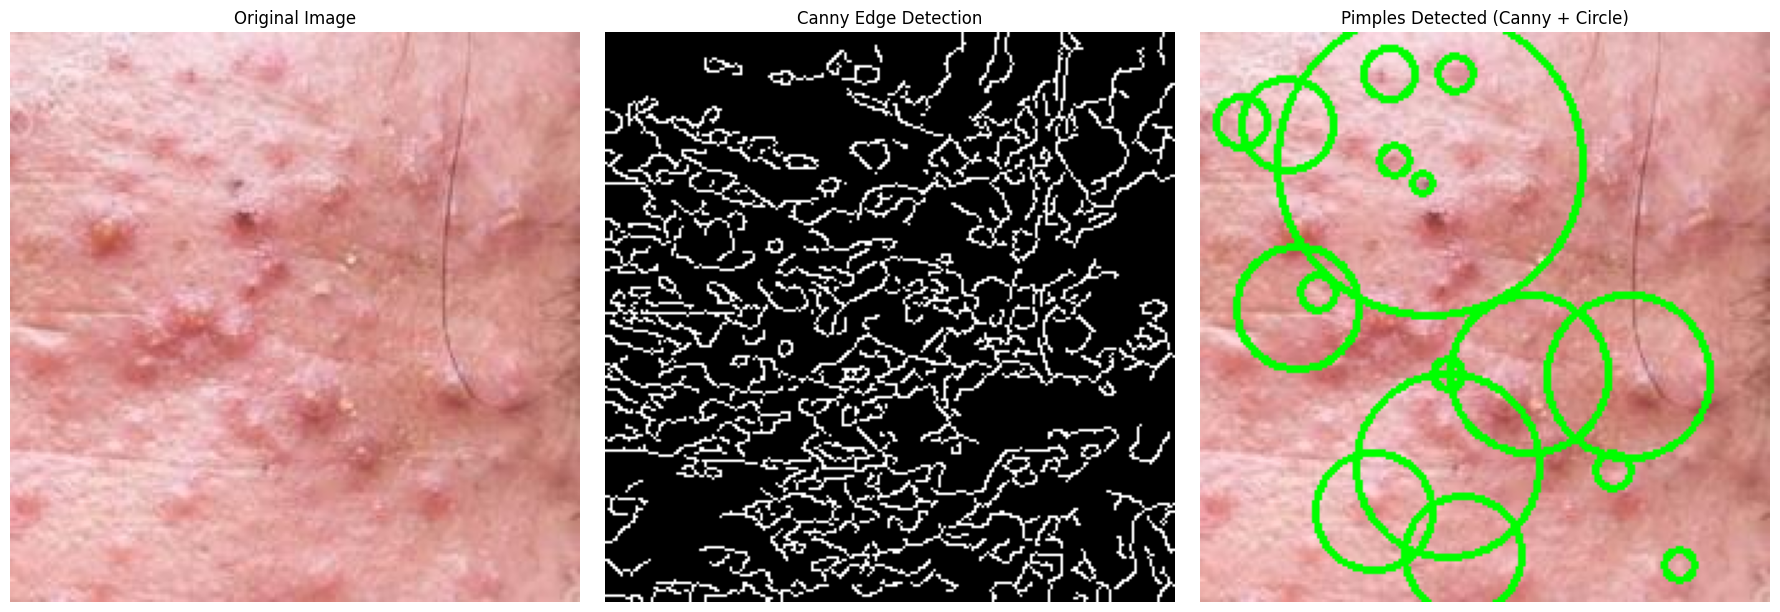

In [181]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_pimples_canny(image_path):
    # Step 1: Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    gray = cv2.equalizeHist(gray)
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)
    # Step 3: Apply Canny edge detection
    edges = cv2.Canny(blurred, threshold1=50, threshold2=150)
    
    # Step 4: Find contours from edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Step 5: Filter contours based on area to remove small noise (optional)
    min_area = 30  # Minimum area of a contour to be considered a pimple
    contours = [c for c in contours if cv2.contourArea(c) > min_area]
    
    # Step 6: Draw circles around the detected pimples (contours)
    result_image = image.copy()
    for contour in contours:
        # Get the minimum enclosing circle for each contour
        (x, y), radius = cv2.minEnclosingCircle(contour)
        
        # Draw the circle on the result image
        cv2.circle(result_image, (int(x), int(y)), int(radius), (0, 255, 0), 2)
    
    # Step 7: Display the original image, edge detection result, and final output
    return result_image, edges

# Example usage
image_path = '/kaggle/input/monkypo/Original Images/Original Images/Others/NM40_01.jpg'
result_image, edges = detect_pimples_canny(image_path)

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original image
axs[0].imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

# Canny edges
axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Canny Edge Detection')
axs[1].axis('off')

# Result with circles around detected pimples
axs[2].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
axs[2].set_title('Pimples Detected (Canny + Circle)')
axs[2].axis('off')

# Show the plots
plt.tight_layout()
plt.show()


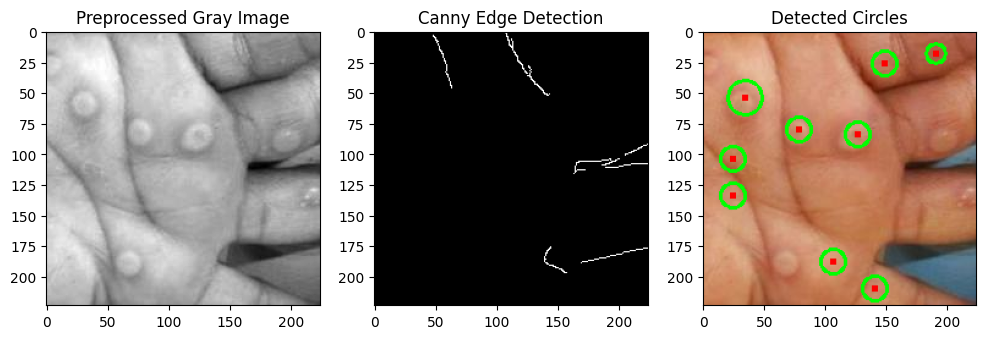

In [130]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adaptive_circle_detection(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 1: Adaptive Preprocessing (Contrast and Noise Adjustment)
    def adaptive_preprocessing(gray):
        # Contrast enhancement: apply if image is low-contrast
        if np.std(gray) < 20:  # Low contrast image
            gray = cv2.equalizeHist(gray)
        return gray

    # Apply preprocessing
    gray = adaptive_preprocessing(gray)

    # Step 2: Adaptive Canny Edge Detection
    def adaptive_canny_edge(gray):
        # Adjust thresholds based on image brightness or contrast
        if np.std(gray) < 20:  # Low contrast image
            low_threshold = 50
            high_threshold = 150
        else:
            low_threshold = 100
            high_threshold = 200
        
        edges = cv2.Canny(gray, low_threshold, high_threshold, apertureSize=3)
        return edges

    # Apply Canny Edge Detection
    edges = adaptive_canny_edge(gray)

    # Step 3: Adaptive Hough Circle Detection
    def adaptive_hough_circles(gray, edges):
        # Dynamically adjust HoughCircles parameters based on edge density
        minDist = 10 if np.sum(edges) > 5000 else 5
        param1 = 10 if np.mean(edges) > 100 else 10
        param2 = 20 if np.sum(edges) > 10000 else 20
        minRadius = 5
        maxRadius = 15
        
        # Detect circles using HoughCircles
        circles = cv2.HoughCircles(
            gray, 
            cv2.HOUGH_GRADIENT, 
            dp=1,                 
            minDist=minDist,     
            param1=param1,       
            param2=param2,       
            minRadius=minRadius, 
            maxRadius=maxRadius  
        )
        
        return circles

    # Apply Hough Circle Detection
    circles = adaptive_hough_circles(gray, edges)

    # Step 4: Draw Circles on the Image
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(image, (x, y), r, (0, 255, 0), 2)  # Draw detected circles
            cv2.rectangle(image, (x - 2, y - 2), (x + 2, y + 2), (0, 0, 255), -1)  # Mark circle center

    # Step 5: Display Results
    plt.figure(figsize=(12, 6))
    
    plt.subplot(131)
    plt.imshow(gray, cmap='gray')
    plt.title('Preprocessed Gray Image')
    
    plt.subplot(132)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge Detection')
    
    plt.subplot(133)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Circles')
    
    plt.show()

    return image  # Return the image with circles drawn

# Example usage:
# Replace 'your_image_path.jpg' with the actual path to your image
image_with_circles = adaptive_circle_detection('/kaggle/input/monkypo/Original Images/Original Images/Monkey Pox/M06_02.jpg')


In [14]:
normalized_images = []
labels = []
normalized_sharpened_images = []

for index, row in df.iterrows():
    # Read the image
    image = cv2.imread(row['File Path'])
    image_sharpened = row['Sharpened Image']
    # Normalize the image by scaling pixel values to [0, 1]
    normalized_image = image.astype('float32') / 255.0
    normalized_sharpened_image = image_sharpened.astype('float32') / 255.0
    # Add the normalized image (as 3D array) and corresponding label to the lists
    normalized_images.append(normalized_image)
    normalized_sharpened_images.append(normalized_sharpened_image)

df['Normalized Image']=normalized_images
df['Normalized sharpened Image']=normalized_sharpened_images
df

,File Path,Image Name,Label,Sharpened Image,Image Shape,Resolution,num_circles,num_edges,mean_R,std_R,skew_R,mean_G,std_G,skew_G,mean_B,std_B,skew_B,Normalized Image,Normalized sharpened Image
0,/kaggle/input/monkypo/Original Images/Original...,NM18_01,Others,"[[[47, 25, 17], [74, 51, 44], [87, 62, 62], [8...","(224, 224, 3)",50176,20,12614,115.254684,31.017301,-0.053462,121.277762,48.847794,-0.273454,207.382115,39.876822,-1.530358,"[[[0.18431373, 0.14901961, 0.13725491], [0.227...","[[[0.18431373, 0.09803922, 0.06666667], [0.290..."
1,/kaggle/input/monkypo/Original Images/Original...,NM22_01,Others,"[[[78, 107, 255], [84, 114, 255], [82, 114, 25...","(224, 224, 3)",50176,29,14087,88.406150,41.985382,0.947466,135.500996,43.583440,0.300375,250.226164,13.987239,-6.036009,"[[[0.44313726, 0.49019608, 0.7411765], [0.4509...","[[[0.30588236, 0.41960785, 1.0], [0.32941177, ..."
2,/kaggle/input/monkypo/Original Images/Original...,NM51_01,Others,"[[[154, 199, 255], [144, 189, 255], [133, 177,...","(224, 224, 3)",50176,47,15113,133.468630,49.374042,-0.632141,169.680664,40.120017,-0.895333,253.497608,5.090706,-5.173814,"[[[0.6862745, 0.75686276, 0.87058824], [0.6705...","[[[0.6039216, 0.78039217, 1.0], [0.5647059, 0...."
3,/kaggle/input/monkypo/Original Images/Original...,NM58_01,Others,"[[[47, 96, 238], [44, 94, 236], [44, 93, 235],...","(224, 224, 3)",50176,26,10351,21.840063,25.880856,1.542661,63.383988,27.346725,0.530997,209.378288,21.025813,-0.204091,"[[[0.38431373, 0.4627451, 0.6862745], [0.38039...","[[[0.18431373, 0.3764706, 0.93333334], [0.1725..."
4,/kaggle/input/monkypo/Original Images/Original...,NM90_01,Others,"[[[24, 59, 131], [0, 10, 82], [0, 0, 70], [2, ...","(224, 224, 3)",50176,51,6578,66.264051,49.162278,0.418112,118.166394,48.065762,-0.597676,238.399135,44.272979,-2.849719,"[[[0.14117648, 0.19607843, 0.30980393], [0.066...","[[[0.09411765, 0.23137255, 0.5137255], [0.0, 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,/kaggle/input/monkypo/Original Images/Original...,M33_01,Monkey Pox,"[[[30, 17, 15], [30, 17, 15], [27, 17, 15], [2...","(224, 224, 3)",50176,53,10011,79.426598,66.025052,0.506205,117.015804,78.952411,-0.268287,184.788106,93.989819,-0.843229,"[[[0.09411765, 0.07450981, 0.07058824], [0.094...","[[[0.11764706, 0.06666667, 0.05882353], [0.117..."
224,/kaggle/input/monkypo/Original Images/Original...,M49_01,Monkey Pox,"[[[93, 140, 193], [102, 150, 202], [116, 164, ...","(224, 224, 3)",50176,26,4880,64.007394,70.398324,0.868362,107.464385,69.548187,-0.058474,191.196189,65.331566,-1.457224,"[[[0.5568628, 0.6313726, 0.7137255], [0.572549...","[[[0.3647059, 0.54901963, 0.75686276], [0.4, 0..."
225,/kaggle/input/monkypo/Original Images/Original...,M36_01,Monkey Pox,"[[[33, 142, 255], [30, 140, 255], [26, 135, 25...","(224, 224, 3)",50176,15,5553,93.208925,36.246545,-0.000429,154.399135,25.474359,-0.380485,253.331712,6.264777,-6.659493,"[[[0.40392157, 0.5764706, 0.7882353], [0.4, 0....","[[[0.12941177, 0.5568628, 1.0], [0.11764706, 0..."
226,/kaggle/input/monkypo/Original Images/Original...,M17_02,Monkey Pox,"[[[1, 38, 177], [0, 36, 175], [0, 32, 171], [0...","(224, 224, 3)",50176,39,13051,84.283442,29.554249,0.411215,115.993662,40.165637,-0.261831,237.218172,25.413178,-1.645453,"[[[0.16470589, 0.22352941, 0.44313726], [0.160...","[[[0.003921569, 0.14901961, 0.69411767], [0.0,..."


In [15]:
final_df=df[['Image Name','Label','num_circles','num_edges','mean_R','std_R','skew_R','mean_G','std_G','skew_G','mean_B','std_B','skew_B']]

In [16]:
final_df['Label'] = final_df['Label'].map({'Monkey Pox': 1, 'Others': 0})
print(final_df.head())


  Image Name  Label  num_circles  num_edges      mean_R      std_R    skew_R  \
0    NM18_01      0           20      12614  115.254684  31.017301 -0.053462   
1    NM22_01      0           29      14087   88.406150  41.985382  0.947466   
2    NM51_01      0           47      15113  133.468630  49.374042 -0.632141   
3    NM58_01      0           26      10351   21.840063  25.880856  1.542661   
4    NM90_01      0           51       6578   66.264051  49.162278  0.418112   

       mean_G      std_G    skew_G      mean_B      std_B    skew_B  
0  121.277762  48.847794 -0.273454  207.382115  39.876822 -1.530358  
1  135.500996  43.583440  0.300375  250.226164  13.987239 -6.036009  
2  169.680664  40.120017 -0.895333  253.497608   5.090706 -5.173814  
3   63.383988  27.346725  0.530997  209.378288  21.025813 -0.204091  
4  118.166394  48.065762 -0.597676  238.399135  44.272979 -2.849719  


/tmp/ipykernel_30/1067552965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Label'] = final_df['Label'].map({'Monkey Pox': 1, 'Others': 0})


In [17]:
final_df.to_csv('/kaggle/working/data.csv', index=False)


In [18]:
print(final_df['Label'].unique())


[0 1]


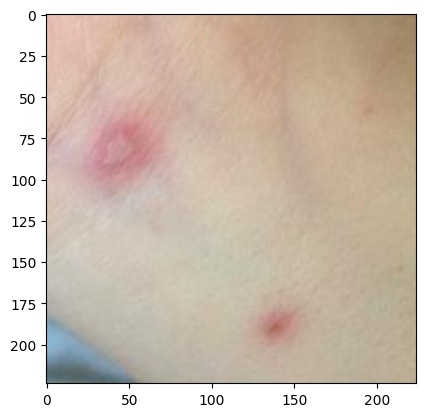

In [14]:
image=normalized_df.iloc[30,0]
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [19]:
shuffled_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)
# Print the first few rows of the shuffled DataFrame
print(shuffled_df.head())

  Image Name  Label  num_circles  num_edges     mean_R      std_R    skew_R  \
0     M32_02      1           20      12030  97.902722  37.407566  0.049141   
1    NM06_01      0           25      10765  37.908163  47.654857  1.654547   
2    NM63_01      0           34      10680  60.182199  37.156606  1.088275   
3     M01_02      1           10      10176  62.183614  34.760209 -0.102145   
4    NM05_01      0           13       6622  77.909299  68.981182  0.490125   

       mean_G      std_G    skew_G      mean_B      std_B    skew_B  
0   82.121054  32.156339  0.428333  199.808474  35.664528 -1.069900  
1  104.495057  45.241102  0.823627  222.663445  26.990817 -1.508783  
2  163.065689  31.571290 -1.402461  253.316765  10.250655 -9.599708  
3   99.179847  31.758455 -0.920186  224.606047  42.908615 -1.770017  
4  115.488381  62.229356  0.102269  200.383052  46.423474 -1.364095  


In [20]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

# Separate features and labels
X = final_df.drop(columns=['Label','Image Name'])  # Features (all columns except the target)
y = final_df['Label']                # Target (label column)

# Split into train and temp sets
X_train,  X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [21]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(y_test, y_pred, display_labels=['Class 0', 'Class 1']):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()
    
    TN, FP, FN, TP = cm.ravel()
    
    # Calculate Sensitivity (Recall)
    sensitivity = TP / (TP + FN)
    sensitivity = round(sensitivity, 3)
    print(f'Sensitivity (Recall): {sensitivity}')
    
    # Calculate Specificity
    specificity = TN / (TN + FP)
    specificity = round(specificity, 3)
    print(f'Specificity: {specificity}')
    
    # Calculate Positive Predictive Value (PPV)
    ppv = TP / (TP + FP)
    ppv = round(ppv, 3)
    print(f'Positive Predictive Value (PPV): {ppv}')
    
    # Calculate Negative Predictive Value (NPV)
    npv = TN / (TN + FN)
    npv = round(npv, 3)
    print(f'Negative Predictive Value (NPV): {npv}')

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

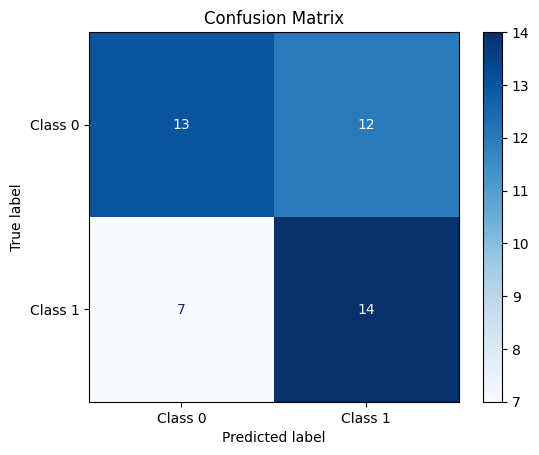

Sensitivity (Recall): 0.667
Specificity: 0.52
Positive Predictive Value (PPV): 0.538
Negative Predictive Value (NPV): 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.52      0.58        25
           1       0.54      0.67      0.60        21

    accuracy                           0.59        46
   macro avg       0.59      0.59      0.59        46
weighted avg       0.60      0.59      0.59        46

Accuracy: 0.5869565217391305


In [22]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
evaluate_model(y_test,y_pred_svm)

# **Recursive Feature Elimination (RFE) Summary**
Recursive Feature Elimination (RFE) is a feature selection technique commonly used in machine learning to identify the most relevant subset of features for a predictive model. It works iteratively by:


* Model Fitting: Training a model on the current set of features and assigning weights (or importance) to each feature.
* Feature Ranking: Evaluating the importance of features based on the model’s coefficients or feature importance scores.
* Feature Elimination: Removing the least important feature(s) from the dataset.Repetition: Repeating the process until the desired number of features is reached.

RFE helps improve model performance by reducing overfitting and computation time while focusing on the most impactful features. It is particularly effective when combined with linear models (like SVM with a linear kernel), which provide clear importance metrics for features.

In [42]:
#RFEEEE
from sklearn.feature_selection import RFE
# Initialize the SVM model (Support Vector Classifier)
model = SVC(kernel="linear")  # You can choose other kernels like 'rbf', 'poly', etc.

# Apply RFE for feature selection on the training data only
selector = RFE(estimator=model, n_features_to_select=3)  # Select the number of features
selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.support_]
print("Selected features:", selected_features)

# Train model using selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Fit model on the training set
model.fit(X_train_selected, y_train)

# Evaluate the model on the test set
test_score = model.score(X_test_selected, y_test)
print("Test score:", test_score)

Selected features: Index(['skew_R', 'mean_G', 'std_B'], dtype='object')
Test score: 0.6956521739130435


# **Forward Feature Selection Summary**
Forward Feature Selection is a wrapper-based feature selection technique that begins with an empty set of features and iteratively adds the most significant feature to the model at each step. The goal is to identify a subset of features that maximizes the model's performance based on a specific evaluation metric (e.g., accuracy, precision).

**Steps in Forward Feature Selection**
* Initialization: Start with an empty set of selected features.
* Feature Evaluation: Evaluate each feature individually by adding it to the current set of selected features and fitting the model.
* Feature Addition: Select the feature that results in the best model performance and add it to the selected set.
* Repetition: Repeat the process until a stopping criterion is met (e.g., no further improvement in performance or reaching a desired number of features).

**Parameters of Interest**
* Evaluation Metric: Defines the performance measure (e.g., accuracy, F1-score) used to select features.
* Stopping Criterion: Determines when the process should halt (e.g., a fixed number of features or no significant improvement).

In [45]:
#FORWARDDDDDD
from sklearn.metrics import accuracy_score

model = SVC(kernel="linear")

selected_features = []
remaining_features = list(X_train.columns)
best_score = 0  # Initialize with a very low score
consecutive_no_improvement = 0  # Counter for consecutive iterations with no improvement
max_no_improvement = 5  # Stop after 5 iterations without improvement

# Forward selection with improved stopping condition
while remaining_features and consecutive_no_improvement < max_no_improvement:
    scores = []
    for feature in remaining_features:
        # Add the current feature to the selected set
        temp_features = selected_features + [feature]
        model.fit(X_train[temp_features], y_train)  # Train model on current feature set
        y_pred = model.predict(X_test[temp_features])  # Predict on the test set
        score = accuracy_score(y_test, y_pred)  # Evaluate model's performance
        scores.append((feature, score))

    # Select the feature with the highest score
    best_feature, new_best_score = max(scores, key=lambda x: x[1])

    # Only add the feature if it improves the score
    if new_best_score > best_score:  # Check if the best feature improves the score
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_score = new_best_score  # Update the best score
        consecutive_no_improvement = 0  # Reset counter since we found an improvement
    else:
        consecutive_no_improvement += 1  # Increment counter if no improvement

print("Selected features:", selected_features)

Selected features: ['std_B', 'mean_R']


# **Backward Feature Elimination Summary**
Backward Feature Elimination is a wrapper-based feature selection method that starts with all features in the dataset and iteratively removes the least significant feature at each step. The goal is to identify a subset of features that optimizes the model's performance according to a chosen evaluation metric (e.g., accuracy, F1-score).

**Steps in Backward Feature Elimination**
* Initialization: Begin with all features included in the model.
* Feature Evaluation: Evaluate the model’s performance by temporarily removing each feature one at a time.
* Feature Removal: Remove the feature whose absence has the smallest negative (or most positive) impact on the model’s performance.
* Repetition: Repeat the process until a stopping criterion is met (e.g., a desired number of features or no significant improvement in performance).

**Parameters of Interest**

* Evaluation Metric: Determines how feature importance is assessed (e.g., accuracy, precision).
* Stopping Criterion: Specifies when the elimination process should stop (e.g., reaching a fixed number of features or no further performance gains).

In [46]:
#backkkkwarddd
from sklearn.metrics import accuracy_score

model = SVC(kernel="linear")
selected_features = list(X_train.columns)
best_score = 0  # Initialize with a very low score

# Backward elimination
while len(selected_features) > 0:
    scores = []
    for feature in selected_features:
        temp_features = [f for f in selected_features if f != feature]
        model.fit(X_train[temp_features], y_train)  # Train model without the current feature
        y_pred = model.predict(X_test[temp_features])  # Predict on the test set
        score = accuracy_score(y_test, y_pred)  # Evaluate model's performance
        scores.append((feature, score))

    # Find the feature with the worst score and remove it
    worst_feature, worst_score = min(scores, key=lambda x: x[1])

    # If removing a feature decreases the score, stop the process
    if worst_score >= best_score:  # Stop if removing the feature doesn't improve performance
        break

    # If performance improves, remove the worst feature and continue
    selected_features.remove(worst_feature)
    best_score = worst_score  # Update the best score after removal

print("Selected features:", selected_features)

Selected features: ['num_circles', 'num_edges', 'mean_R', 'std_R', 'skew_R', 'mean_G', 'std_G', 'skew_G', 'mean_B', 'std_B', 'skew_B']


# **Exhaustive Feature Selection Summary**
Exhaustive Feature Selection is a wrapper-based technique that evaluates all possible combinations of features in a dataset to identify the subset that provides the best performance for a given model. This method guarantees the selection of the optimal feature set, as it examines every potential combination.

**Steps in Exhaustive Feature Selection**
* Generate Combinations: Create all possible feature subsets of varying sizes, from one feature to all features.
* Model Training: For each subset, train the model and evaluate its performance using a specified metric (e.g., accuracy, F1-score).
* Subset Evaluation: Identify the subset with the highest performance score.
* Selection: Return the subset of features that optimizes the evaluation metric.
  
**Parameters of Interest**
* Evaluation Metric: Defines the measure of model performance used to rank feature subsets (e.g., accuracy, precision).
* Stopping Criterion: Typically the method stops after all subsets have been evaluated.

In [ ]:
#Exhaustive Feature Selection
from itertools import combinations
model = SVC(kernel="linear")
best_score = 0
best_features = []

# Exhaustive feature selection
for n in range(1, len(X_train.columns) + 1):
    for combo in combinations(X_train.columns, n):
        model.fit(X_train[list(combo)], y_train)
        y_pred = model.predict(X_test[list(combo)])
        score = accuracy_score(y_test, y_pred)
        if score > best_score:
            best_score = score
            best_features = combo

print("Best features:", best_features)